# <font color = "purple">Cardiovascular Disease Risks  </font>
**How can healthcare systems identify 2 (or more) key symptoms associated with cardiovascular disease in order to make lifestyle recommendations to patients and allocate resources accordingly within the next year?** 


# Part 1: <font color = "blue">Data Cleaning </font>

#### Step 1: Importing Necessary Libraries

In [4]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
import pandas as pd 

In [6]:
import seaborn as sns 
sns.set_style("darkgrid")

#### Step 2: Reading CSV file 

In [8]:
cardio_health = pd.read_csv('cardio_data_processed.csv') 

#### Step 3: Exploring, Converting

In [10]:
cardio_health.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


##### Checking for Nulls

In [11]:
cardio_health.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [12]:
cardio_health.drop('bp_category_encoded', axis =1, inplace = True)

There are no null values in the data, and we drop the last column because it is just a repetition of the column before it 

##### Adding an age in years column

In [14]:
cardio_health['age_years'] = (cardio_health['age']/365).round(2)
cardio_health.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.967120,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.927679,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.507805,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.710479,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.011177,Normal


##### Cleaned up Data Types

In [16]:
cardio_health.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_years      float64
bmi            float64
bp_category     object
dtype: object

In [17]:
cardio_health ['gender'] = cardio_health['gender'].map ({1:'female', 2: 'male'})
cardio_health['gender']

0          male
1        female
2        female
3          male
4        female
          ...  
68200      male
68201    female
68202      male
68203    female
68204    female
Name: gender, Length: 68205, dtype: object

In [18]:
cardio_health.loc[:,'smoke':'cardio']= cardio_health.loc [:, 'smoke':'cardio'].astype(int)
cardio_health.loc[:,'smoke':'cardio']

,smoke,alco,active,cardio
0,0,0,1,0
1,0,0,1,1
2,0,0,0,1
3,0,0,1,1
4,0,0,0,0
...,...,...,...,...
68200,1,0,1,0
68201,0,0,1,1
68202,0,1,0,1
68203,0,0,0,1


Converted binary columns to boolean and created a gender names column

# Part 2: <font color = "blue"> Analyzing </font>

## Gender Differences 

#### Step 4: Does one gender tend to have more prevalence of cardiovascular disease? 
We output a table with categories of females and males, with and without cardiovascular disease. We then plot, and create a column with percentages to analyze if there is a difference between prevalence depending on gender

In [704]:
count_by_gender = cardio_health.groupby('gender')['cardio'].value_counts().unstack()
count_by_gender

cardio,0,1
gender,,
female,22593,21834
male,11940,11838


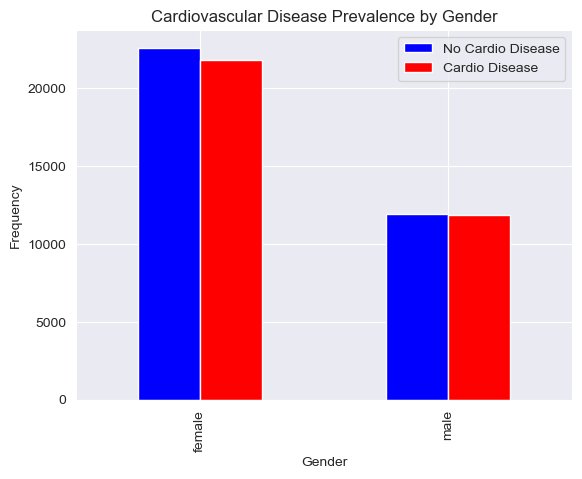

<Figure size 1000x400 with 0 Axes>

In [712]:
count_by_gender.plot(kind = 'bar', color = ['blue', 'red'])
plt.title ("Cardiovascular Disease Prevalence by Gender") 
plt.xlabel ("Gender")
plt.ylabel("Frequency")
plt.legend(["No Cardio Disease", "Cardio Disease"])
plt.figure(figsize=(10, 4))
plt.show()

In [708]:
count_by_gender_percentages = count_by_gender.copy()
count_by_gender_percentages['total']= count_by_gender_percentages [0] + count_by_gender_percentages[1]
count_by_gender_percentages['percentage_of_cardio_disease'] = (count_by_gender_percentages [1] / count_by_gender_percentages ['total'])*100
count_by_gender_percentages

cardio,0,1,total,percentage_of_cardio_disease
gender,,,,
female,22593,21834,44427,49.145790
male,11940,11838,23778,49.785516


**We observe that the sample size has a much higher number of females, however the percentage of cardiovascular occurence between the two genders is relatively equal** 

## Health Factors

### Blood Pressure
#### Does BP measurement and category affect cardiovasular disease occurence? 
#### Step 5.1: Blood Pressure by Raw Systolic and Diastolic BP Measurements

To observe the effect of blood pressure measurement and category, we create two tables, one for those with cardiovascular disesease and one for those without it. We then observe the distribution of systolic blood pressure and diastolic blood pressure in both.

In [717]:
cardio_disease = cardio_health[cardio_health['cardio']==1]
cardio_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,age_years,bmi,bp_category,smoke_category,alc_category,active_category,chol_category,age_group
1,1,20228,female,156,85.0,140,90,3,1,0,...,1,1,55.42,34.927679,Hypertension Stage 2,Non-Smoker,Does not consume Alcohol,Physically Active,Well Above Normal,50 and Above
2,2,18857,female,165,64.0,130,70,3,1,0,...,0,1,51.66,23.507805,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Not Physically Active,Well Above Normal,50 and Above
3,3,17623,male,169,82.0,150,100,1,1,0,...,1,1,48.28,28.710479,Hypertension Stage 2,Non-Smoker,Does not consume Alcohol,Physically Active,Normal,Below 50
7,12,22584,male,178,95.0,130,90,3,3,0,...,1,1,61.87,29.983588,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Physically Active,Well Above Normal,50 and Above
15,24,16782,male,172,112.0,120,80,1,1,0,...,0,1,45.98,37.858302,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Not Physically Active,Normal,Below 50


In [719]:
no_cardio_disease = cardio_health[cardio_health['cardio']==0]
no_cardio_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,age_years,bmi,bp_category,smoke_category,alc_category,active_category,chol_category,age_group
0,0,18393,male,168,62.0,110,80,1,1,0,...,1,0,50.39,21.967120,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Physically Active,Normal,50 and Above
4,4,17474,female,156,56.0,100,60,1,1,0,...,0,0,47.87,23.011177,Normal,Non-Smoker,Does not consume Alcohol,Not Physically Active,Normal,Below 50
5,8,21914,female,151,67.0,120,80,2,2,0,...,0,0,60.04,29.384676,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Not Physically Active,Above Normal,50 and Above
6,9,22113,female,157,93.0,130,80,3,1,0,...,1,0,60.58,37.729725,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Physically Active,Well Above Normal,50 and Above
8,13,17668,female,158,71.0,110,70,1,1,0,...,1,0,48.41,28.440955,Normal,Non-Smoker,Does not consume Alcohol,Physically Active,Normal,Below 50


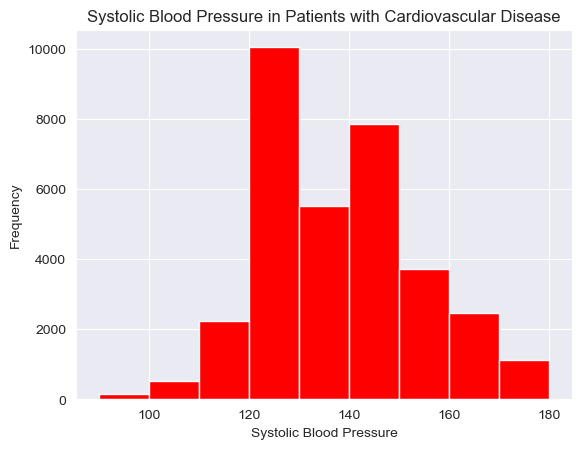

In [31]:
cardio_disease['ap_hi'].plot (kind = 'hist', bins = [90,100,110,120,130,140,150,160,170,180],title = 'Systolic Blood Pressure in Patients with Cardiovascular Disease', color = 'red')
plt.xlabel('Systolic Blood Pressure')
plt.show()

**Systolic blood pressure in patients with cardiovascular disease is positively skewed, meaning a higher frequency has a higher systolic blood pressure**

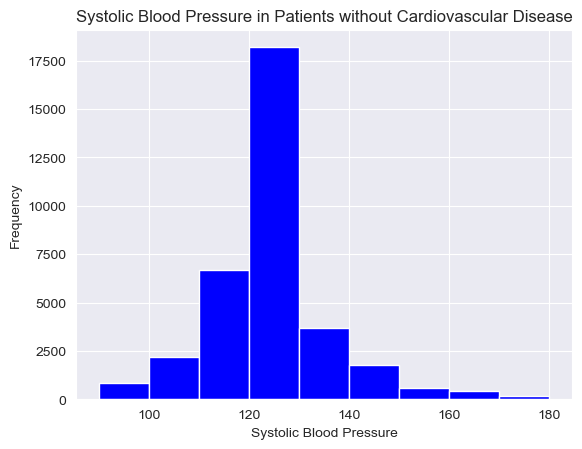

In [32]:
no_cardio_disease['ap_hi'].plot (kind = 'hist', bins = [90,100,110,120,130,140,150,160,170,180],title = 'Systolic Blood Pressure in Patients without Cardiovascular Disease', color = 'blue')
plt.xlabel('Systolic Blood Pressure')
plt.show()

**In patients with no cardiovascular disease, a very large frequency lies between 120 and 130, with much less on the higher end of systolic blood pressure**

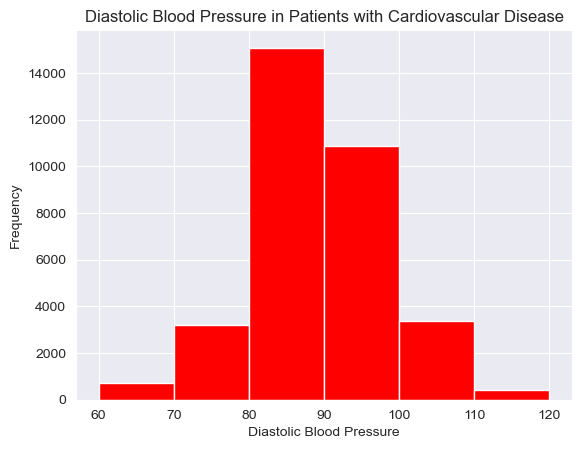

In [33]:
cardio_disease['ap_lo'].plot (kind = 'hist',bins = [60,70,80,90,100,110,120], title = 'Diastolic Blood Pressure in Patients with Cardiovascular Disease', color = 'red')
plt.xlabel('Diastolic Blood Pressure')
plt.show()

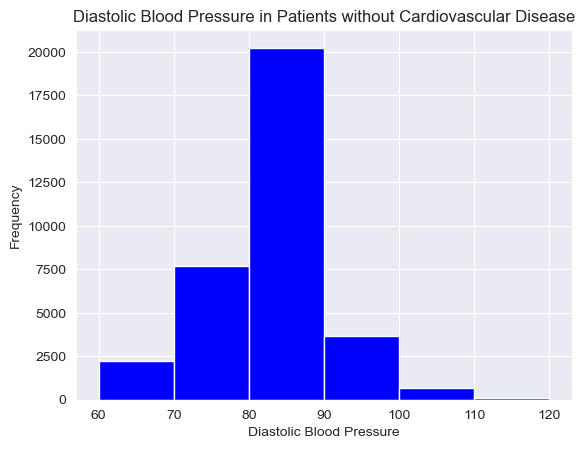

In [34]:
no_cardio_disease['ap_lo'].plot (kind = 'hist',bins = [60,70,80,90,100,110,120], title = 'Diastolic Blood Pressure in Patients without Cardiovascular Disease', color = 'blue')
plt.xlabel('Diastolic Blood Pressure')
plt.show()

**We observe the same trend for diastolic blood pressure. Overall, patients with cardiovascular disease tend to have high blood pressure levels**

#### Step 5.2: Blood Pressure by BP Categories
Looking at the number of patients per category with or without cardio disease (0 - without and 1 - with) and then plotting it

In [737]:
count_of_hypertension_s1= cardio_health.groupby('bp_category')['cardio'].value_counts()
print ("Count of patients with cardiovascular disease by BP category")
count_of_hypertension_s1

Count of patients with cardiovascular disease by BP category


bp_category           cardio
Elevated              0          2100
                      1          1001
Hypertension Stage 1  0         21927
                      1         17823
Hypertension Stage 2  1         12761
                      0          3176
Normal                0          7330
                      1          2087
Name: count, dtype: int64

In [241]:
cardio_disease_all_count = cardio_disease['bp_category'].value_counts()
no_cardio_disease_all_count = no_cardio_disease['bp_category'].value_counts()

<Figure size 800x400 with 0 Axes>

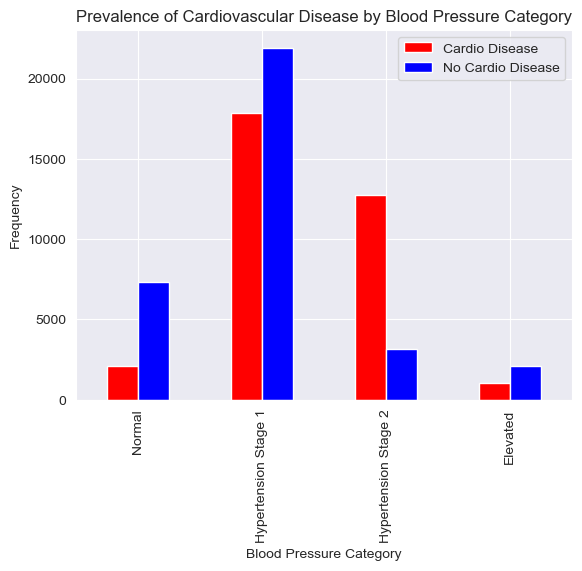

In [777]:
plt.figure(figsize=(8, 4))
count_df = pd.DataFrame ({ 'Cardio Disease': cardio_disease_all_count, 'No Cardio Disease': no_cardio_disease_all_count})
custom_order = ['Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Elevated']
count_df.index = pd.Categorical(count_df.index, categories=custom_order, ordered=True)
count_df = count_df.sort_index()
count_df.plot (kind = 'bar', color = ["red", "blue"])
plt.title("Prevalence of Cardiovascular Disease by Blood Pressure Category")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Frequency")
plt.show()

**Hypertension Stage 1 has the highest frequency of patients in general, both with and without cardiovascular disease. The difference between them doesn't seem huge, as opposed to Hypertension Stage 2 where most patients who have it have cardiaovascular disease**

#### Step 5.3: Correlation
Creating boolean variables for each BP Category and finding the correlation between their occurence and cardiac disease:

In [339]:
abnormal_bp= cardio_health[['cardio',
                                            'bp_category']].copy()
def boolean_hypertension (bp_category): 
    if bp_category== "Hypertension Stage 1": 
        return 1 
    else: 
        return 0
abnormal_bp.loc[:,'hyps1'] = abnormal_bp['bp_category'].apply(boolean_hypertension)


In [341]:
def boolean_hypertensions2 (bp_category): 
    if bp_category== "Hypertension Stage 2": 
        return 1 
    else: 
        return 0
abnormal_bp.loc[:,'hyps2'] = abnormal_bp['bp_category'].apply(boolean_hypertensions2)
def boolean_elevated (bp_category): 
    if bp_category== "Elevated": 
        return 1 
    else: 
        return 0
abnormal_bp.loc[:,'elevated'] = abnormal_bp['bp_category'].apply(boolean_elevated)
def boolean_normal (bp_category): 
    if bp_category== "Normal": 
        return 1 
    else: 
        return 0
abnormal_bp.loc[:,'normal'] = abnormal_bp['bp_category'].apply(boolean_normal)


In [343]:
correlation_abnormal_cardio = abnormal_bp[['hyps1','hyps2','elevated','normal']].corrwith(abnormal_bp['cardio'])
print("Correlation between each BP category and Cardiovascular Disease:")
correlation_abnormal_cardio

Correlation between each BP category and Cardiovascular Disease:


hyps1      -0.107116
hyps2       0.339099
elevated   -0.074598
normal     -0.217798
dtype: float64

**Interestingly, we observe that Hypertension Stage 1 and Elevated BP Categories, along with normal, have negative (but low) correlations with cardiovascular disease, while Hypertension Stage 2 has a higher, positive correlation. A doctor would be worried about a patient with Hypertension Stage 2, but what factors within the other BP Categories contribute to cardiovascular disease prediction?**

## Lifestyle

#### Smoking, Alcoholic Intake, and Physical Activity
#### Step 6.1: What Lifestyle Factors are Associated with Cardiovascular Disease?
We create a filtered dataframe to look at lifestyle attributes specifically, then plot cardiovascular disease prevalence for each

In [362]:
smoking_active_data = cardio_health[['smoke','age_years','active','cardio','alco']].copy()
smoking_active_data.head()

,smoke,age_years,active,cardio,alco
0,0,50.39,1,0,0
1,0,55.42,1,1,0
2,0,51.66,0,1,0
3,0,48.28,1,1,0
4,0,47.87,0,0,0


##### Smoking

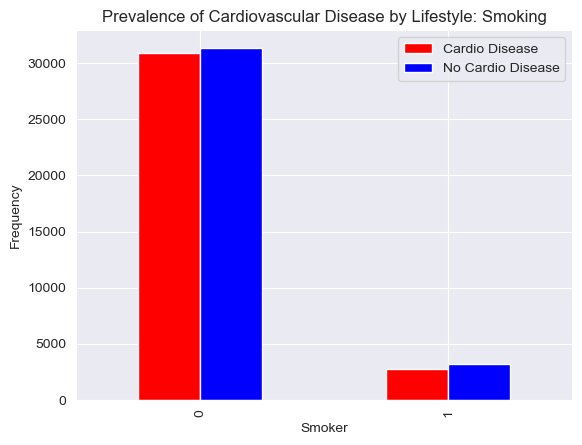

In [360]:
cardio_disease_smoke_count = cardio_disease['smoke'].value_counts()
no_cardio_disease_smoke_count = no_cardio_disease['smoke'].value_counts()
smoke_df = pd.DataFrame ({ 'Cardio Disease': cardio_disease_smoke_count, 'No Cardio Disease': no_cardio_disease_smoke_count})
smoke_df.plot (kind = 'bar', color = ["red", "blue"])
plt.title("Prevalence of Cardiovascular Disease by Lifestyle: Smoking")
plt.xlabel("Smoker")
plt.ylabel("Frequency")
plt.show()

##### Alcoholic Intake

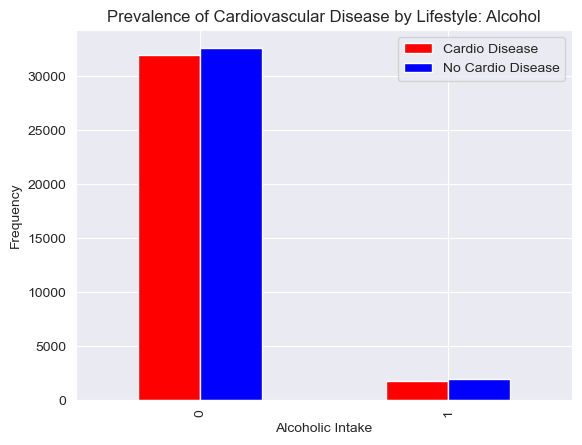

In [384]:
cardio_disease_alco_count = cardio_disease['alco'].value_counts().sort_index()
no_cardio_disease_alco_count = no_cardio_disease['alco'].value_counts().sort_index()
alco_df = pd.DataFrame ({ 'Cardio Disease': cardio_disease_alco_count, 'No Cardio Disease': no_cardio_disease_alco_count})
alco_df.plot (kind = 'bar', color = ["red", "blue"])
plt.title("Prevalence of Cardiovascular Disease by Lifestyle: Alcohol")
plt.xlabel("Alcoholic Intake")
plt.ylabel("Frequency")
plt.show()

##### Physical Activity

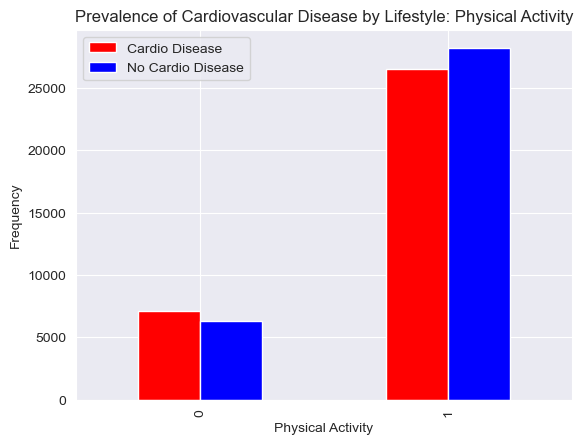

In [386]:
cardio_disease_active_count = cardio_disease['active'].value_counts().sort_index()
no_cardio_disease_active_count = no_cardio_disease['active'].value_counts().sort_index()
alco_df = pd.DataFrame ({ 'Cardio Disease': cardio_disease_active_count, 'No Cardio Disease': no_cardio_disease_active_count})
alco_df.plot (kind = 'bar', color = ["red", "blue"])
plt.title("Prevalence of Cardiovascular Disease by Lifestyle: Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Frequency")
plt.show()

**With smoking and alcoholic intake as binary values, we don't see these lifestyle changes resulting in much of a difference on cardiovascular disease prevalence. There is just a slightly higher number of patients with no cardio disease in all 4 categories (Smokers/Non Smokers/ Those who consume alcohol/Those who dont consume alcohol).** 

**On the other hand with physical activity, we see that there is a slightly higher proportion of people who are not physically active with cardiovascular disease, and a slightly higher proportion of those who are physically active without cardiovascular disease**

**Physical Activity proves to be an interesting attribute that we could look at.**

#### Step 6.2: Correlation

In [150]:
correlation_smoking=smoking_active_data['smoke'].corr(smoking_active_data['cardio'])
correlation_active=smoking_active_data['active'].corr(smoking_active_data['cardio'])
correlation_alc= cardio_health['alco'].corr(cardio_health['cardio'])
print("Correlation between Smoking and Cardiovascular Disease:", correlation_smoking)
print( "Correlation between Physical Activity and Cardiovascular Disease:", correlation_active)
print ("Correlation between Alcoholic Intake and Cardiovascular Disease:", correlation_alc)

Correlation between Smoking and Cardiovascular Disease: -0.016566711504885798
Correlation between Physical Activity and Cardiovascular Disease: -0.03794361931852819
Correlation between Alcoholic Intake and Cardiovascular Disease: -0.009037713184706904


Correlations are very low throughout

## Age
#### Step 7: Does Age play a role in cardiovascular disease prevalence?
We draw a histogram of age spread to observe the frequency of cardiovascular disease by age

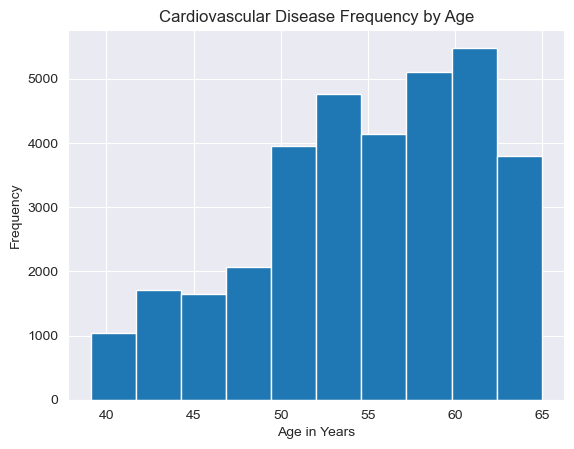

In [148]:
cardio_disease['age_years'].plot(kind ='hist', title = "Cardiovascular Disease Frequency by Age")
plt.xlabel('Age in Years')
plt.show()

#### Step 7.2: Correlation

In [397]:
correlation_age=cardio_health['age_years'].corr(cardio_health['cardio'])
print ("Correlation of age with cardiovascular disease:", correlation_age)

Correlation of age with cardiovascular disease: 0.23903249572719998


**Looking at the histogram, the frequency of cardiovascular disease seems to increase with age, especially past 50 years. The correlation is positive, but not too high (although noted it is higher than any other lifestyle factors)**

To further analyze, we can divide the data into two sections: 50 and above and below 50, since that seems to be a significant age

In [484]:
age_df = cardio_health[['age_years','cardio','gender']].copy()
def age_category (age_years):
    if age_years >= 50: 
        return "50 and Above"
    if age_years < 50: 
        return "Below 50"
age_df['age_group'] = age_df['age_years'].apply(age_category)
proportion_age_group = age_df.groupby('age_group')['cardio'].value_counts().unstack()
total_with_cardio = proportion_age_group[1].sum()
percentage_50_and_above = (proportion_age_group.loc['50 and Above', 1]/total_with_cardio) *100
print (" Percentage of Patients with Cardiovascular Disease who are 50 and above:", percentage_50_and_above)

 Percentage of Patients with Cardiovascular Disease who are 50 and above: 77.48277500593966


**We find that patients who are 50 and above make up around 77% of patients with cardiovascular disease. This reinforces age being a big factor, and helps us hone down on the age group that has highest risk**

## Cholesterol and Glucose 
#### Step 8: Do Cholesterol and Glucose levels play a role in cardiovascular disease prevalence?
##### Correlation

In [171]:
correlation_chol= cardio_health['cholesterol'].corr(cardio_health['cardio'])
correlation_gluc= cardio_health['gluc'].corr(cardio_health['cardio'])
print ("Correlation of Cholesterol Levels and Cardiovascular Disease:", correlation_chol) 
print ("Correlation of Glucose Levels and Cardiovascular Disease:", correlation_gluc)

Correlation of Cholesterol Levels and Cardiovascular Disease: 0.22077815567746764
Correlation of Glucose Levels and Cardiovascular Disease: 0.08890543361958142


**Cholesterol seems to have a postive correlation (similar to that of age with cardiovascular disease)**

Note, however, that glucose and cholesterol are measured in levels (1,2,3), rather than boolean values

# Part 3: <font color = "blue"> Checking our Work and Combining Factors </font> 
Above, we made a few predictions about what factors could be affecting cardiovascular disease prevalence the most, using proportions and correlations. Below, we will combine correlations into one chart to double check that we are looking at the most significant factors

#### Step 9: Checking our work with Correlations (for Numeric Values)

In [461]:
correlated_cardio = cardio_health.corr(method = 'pearson', min_periods = 1, numeric_only = True)

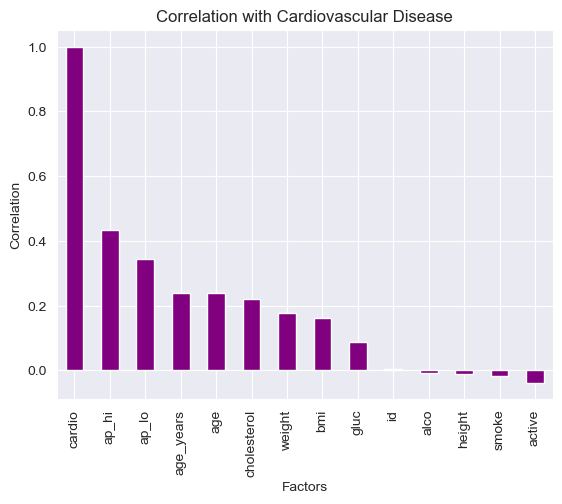

In [469]:
correlation_with_cardio = correlated_cardio['cardio']. sort_values(ascending = False)
correlation_with_cardio.plot (kind = 'bar', title = "Correlation with Cardiovascular Disease", color = 'purple')
plt.xlabel("Factors")
plt.ylabel("Correlation")
plt.show()

The graph reaffirms our analysis from the steps 1-8: blood pressure (ap_hi and ap_lo), age and cholesterol are all of the highest factors affecting cardiovascular disease prevalence. Weight, BMI, and glucose also seem to play an important role, but we will focus on the highest. 

### Step 10.1: Combining Factors: Gender
Since gender was the first factor we explored, we can dive deeper into combining gender with other factors. What combination of factors should alert a doctor that said patient has a higher risk of cardiovascular disease? Are there any red flags?

### Gender and BP

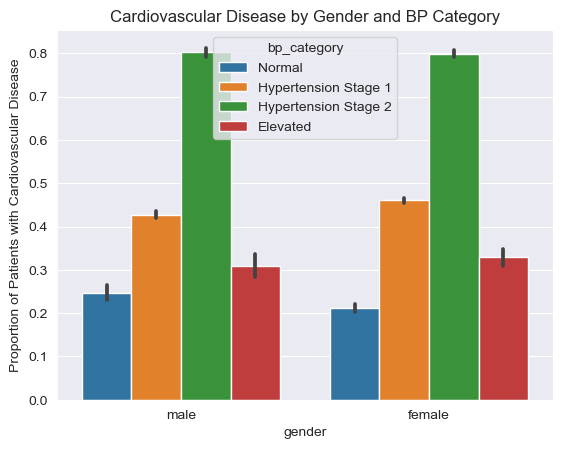

In [813]:
sns.barplot( x= 'gender', y= 'cardio', hue = 'bp_category', hue_order = bp_category_order, data = cardio_health)
plt.title("Cardiovascular Disease by Gender and BP Category")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

This barplot shows the proportion of patients with cardiovascular disease based on each combination of gender and blood pressure category. Some conclusions we can draw: 

1- Hypertension Stage 2 has an incredibly high level of cardiovascular disease prevalence, regardless of gender. 

2- Females have a slightly higher proportion of cardiovascular disease prevalence in the Hypertension Stage 1 and Elevated categories. In elevated however, the error bars overlap, so it might be of more significance in Hypertension Stage 1. 

3- Males have slightly higher prevalence of cardiovascular disease within those with normal BP.

### Gender and Age

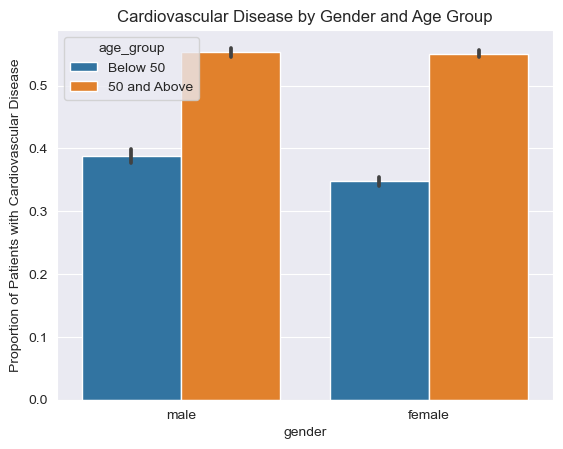

In [817]:
sns.barplot( x= 'gender', y= 'cardio', hue = 'age_group', hue_order = ["Below 50", "50 and Above"], data = age_df)
plt.title("Cardiovascular Disease by Gender and Age Group")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

A quick look at this graph shows us that regardless of gender, the age group 50 and above has a higher prevalence of cardiovascular disease. Below 50 in males seem to have a slightly higher prevalence, but it is not clear if its significant

### Gender and Lifestyle

#### Smoking

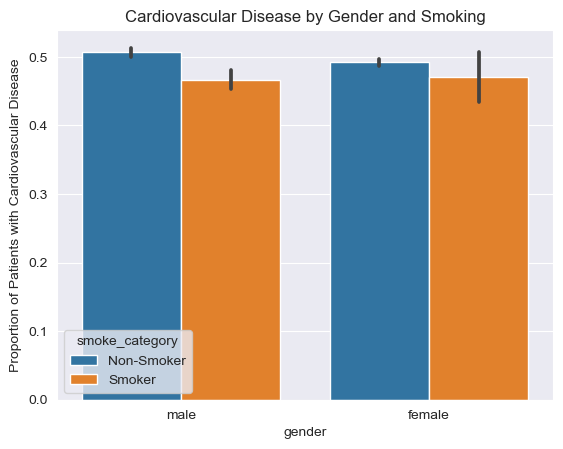

In [498]:
smoke_mapping = {1:"Smoker", 0:"Non-Smoker"}
cardio_health['smoke_category']= cardio_health ['smoke'].map(smoke_mapping)
sns.barplot( x= 'gender', y= 'cardio', hue = 'smoke_category', data = cardio_health)
plt.title("Cardiovascular Disease by Gender and Smoking")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

#### Alcohol Intake

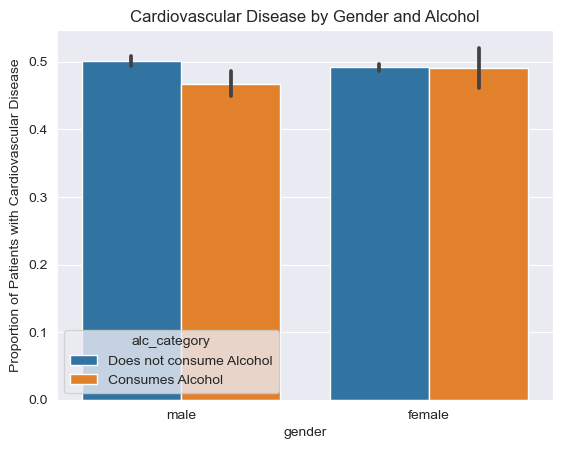

In [503]:
alc_mapping = {1:"Consumes Alcohol", 0:"Does not consume Alcohol"}
cardio_health['alc_category']= cardio_health ['alco'].map(alc_mapping)
sns.barplot( x= 'gender', y= 'cardio', hue = 'alc_category', data = cardio_health)
plt.title("Cardiovascular Disease by Gender and Alcohol")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

#### Physical Activity

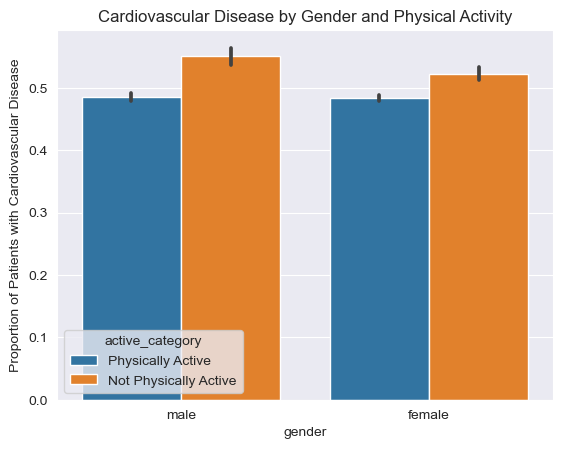

In [506]:
active_mapping = {1:"Physically Active", 0:"Not Physically Active"}
cardio_health['active_category']= cardio_health ['active'].map(active_mapping)
sns.barplot( x= 'gender', y= 'cardio', hue = 'active_category', data = cardio_health)
plt.title("Cardiovascular Disease by Gender and Physical Activity")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

Smoking and alcohol show an interesting (although questionably significant) higher proportion of cardiovascular disease in those who do not smoke or consume alcohol in both genders, although more prevalent in males. Those who are physically active, however, tend to have lower levels of cardiovascular disease, particularly in males. 

### Step 10.2: Combining Factors: Cholesterol and Glucose Levels 
Another interesting combination emerges when we look at cholesterol and glucose levels together.
First, we create columns for the categories, then we plot them together


These mapping functions were used to clean the data for cholesterol and glucose category use

In [685]:
gluc_mapping = {1:"Normal", 2:"Above Normal", 3: "Well Above Normal"}
cholesterol_mapping = {1: "Normal",2: "Above Normal", 3: "Well Above Normal"}                                                

In [203]:
binary_gluc_cholesterol = cardio_health[['cardio','gluc','cholesterol','age','gender']].copy()
gluc_mapping = {1:"Normal", 2:"Above Normal", 3: "Well Above Normal"}
cholesterol_mapping = {1: "Normal",2: "Above Normal", 3: "Well Above Normal"}
binary_gluc_cholesterol['gluc_category']= binary_gluc_cholesterol ['gluc'].map(gluc_mapping)
binary_gluc_cholesterol ['chol_category'] = binary_gluc_cholesterol['cholesterol'].map(cholesterol_mapping)
binary_gluc_cholesterol.head()

,cardio,gluc,cholesterol,age,gender,gluc_category,chol_category
0,0,1,1,18393,male,Normal,Normal
1,1,1,3,20228,female,Normal,Well Above Normal
2,1,1,3,18857,female,Normal,Well Above Normal
3,1,1,1,17623,male,Normal,Normal
4,0,1,1,17474,female,Normal,Normal


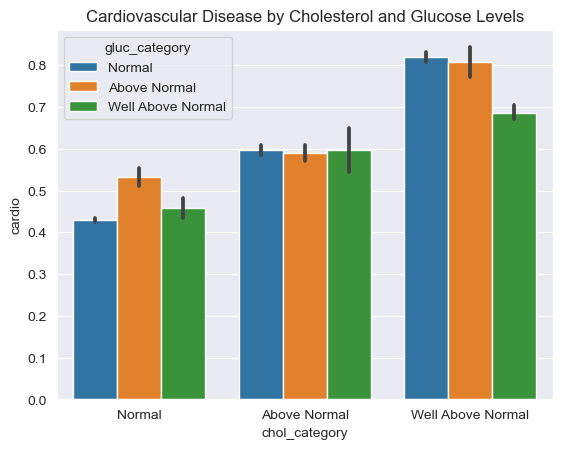

In [509]:
hue_order = ['Normal','Above Normal', 'Well Above Normal']
sns.barplot( x= 'chol_category', y= 'cardio', hue = 'gluc_category', hue_order = hue_order, data = binary_gluc_cholesterol, order = ["Normal","Above Normal","Well Above Normal"])
plt.title("Cardiovascular Disease by Cholesterol and Glucose Levels")
plt.show()

Looking at this graph, we can see that cholesterol levels overwhelmingly determine cardiovascular disease proportion. Having 'Well Above Normal' cholesterol puts you in higher risk of cardiac disease no matter the glucose level you have. 'Above normal' glucose also plays a role, but just looking at the bar sizes the difference is noted.

### Step 10.3: Combining Factors: Gender and Cholesterol 
Based on this finding that cholesterol seems significant even despite glucose, we can analyze gender interactions with cholesterol levels as well. 

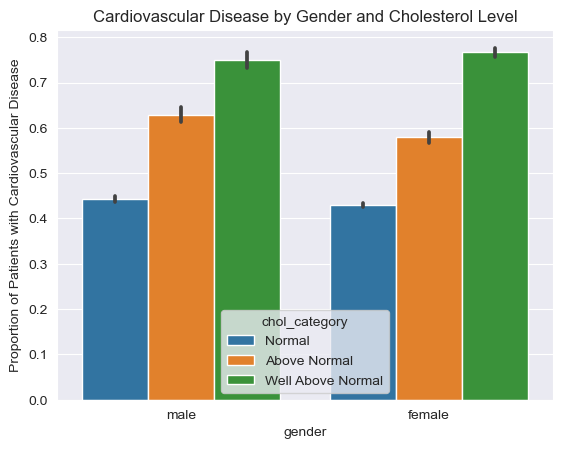

In [520]:
sns.barplot( x= 'gender', y= 'cardio', hue = 'chol_category', hue_order = hue_order, data = binary_gluc_cholesterol)
plt.title("Cardiovascular Disease by Gender and Cholesterol Level")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

It seems that the difference is in "Above Normal" cholesterol with males having a higher proportion of cardiovascular disease

## Findings
So now, based on our analysis with combining categories, we found that different indicators might hold more risk for each gender, while some apply to both:

**For both**: \
    1- Hypertension Stage 2\
    2- Aged 50 and Above
    
**For Females**: \
    1- Hypertension Stage 1 and Elevated Blood Pressure
    
**For Males**: \
    1- Normal BP\
    2- Lack of Physical Activity\
    3- Above Normal Cholesterol

# Part 4: <font color = "blue"> Further Slicing </font> 
Now that we have an idea of some factors that could be more risky for specific genders, we can take it one step further and find a combination of 2 factors that result in higher risk. From a healthcare standpoint, seeing a combination of these factors might then be the "red flag". To simplify we'll analyze one factor for each gender, and for the secondary factors we'll use factors that have signalled significance before (bp category, cholesterol, age, and physical activity)\
**We also know that Hypertension Stage 2 and 50 and above are already "red flags" for both genders**

### Females:

#### Combining BP Category and Cholesterol Level

In [555]:
cardio_health['age_group'] = cardio_health['age_years'].apply(age_category)

In [584]:
female_df = cardio_health[cardio_health['gender']=="female"].copy()
female_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,age_years,bmi,bp_category,smoke_category,alc_category,active_category,chol_category,age_group
1,1,20228,female,156,85.0,140,90,3,1,0,...,1,1,55.42,34.927679,Hypertension Stage 2,Non-Smoker,Does not consume Alcohol,Physically Active,Well Above Normal,50 and Above
2,2,18857,female,165,64.0,130,70,3,1,0,...,0,1,51.66,23.507805,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Not Physically Active,Well Above Normal,50 and Above
4,4,17474,female,156,56.0,100,60,1,1,0,...,0,0,47.87,23.011177,Normal,Non-Smoker,Does not consume Alcohol,Not Physically Active,Normal,Below 50
5,8,21914,female,151,67.0,120,80,2,2,0,...,0,0,60.04,29.384676,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Not Physically Active,Above Normal,50 and Above
6,9,22113,female,157,93.0,130,80,3,1,0,...,1,0,60.58,37.729725,Hypertension Stage 1,Non-Smoker,Does not consume Alcohol,Physically Active,Well Above Normal,50 and Above


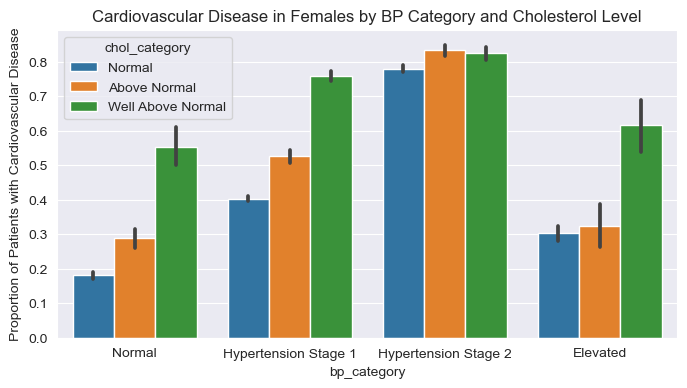

In [638]:
bp_category_order=['Normal','Hypertension Stage 1','Hypertension Stage 2','Elevated']
plt.figure(figsize=(8, 4))
sns.barplot( x= 'bp_category', y= 'cardio', hue = 'chol_category', hue_order = hue_order, order=bp_category_order, data = female_df)
plt.title("Cardiovascular Disease in Females by BP Category and Cholesterol Level")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

We incorporate BP category with cholesterol levels, we again find that Hypertension Stage 2 (regardless of cholesterol levels) has highest prevalence. An interesting observation is that Well Above Normal Cholesterol in every other BP Category has a very high prevelance. This makes sense because high cholesterol levels could mean high cholesterol build up in the arteries, which is linked to hypertension. 

**What does this mean?** \
A lifestyle change to lower cholesterol levels (rather than hypertension medication) could be a better treatment approach. 



#### Combining BP Category and Physical Activity

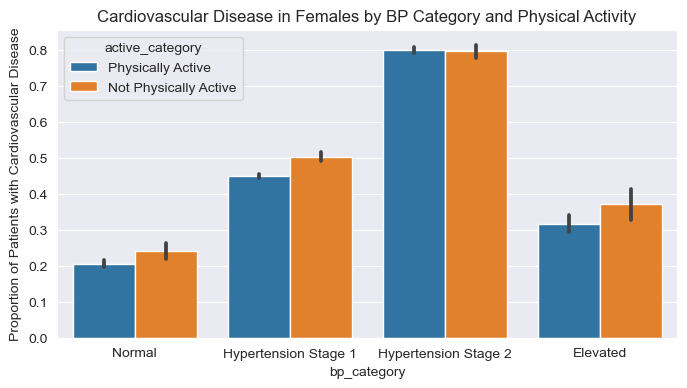

In [642]:
plt.figure(figsize=(8, 4))
sns.barplot( x= 'bp_category', y= 'cardio', hue = 'active_category', order = bp_category_order, data = female_df)
plt.title("Cardiovascular Disease in Females by BP Category and Physical Activity")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

#### Combining Cholesterol Category and Physical Activity

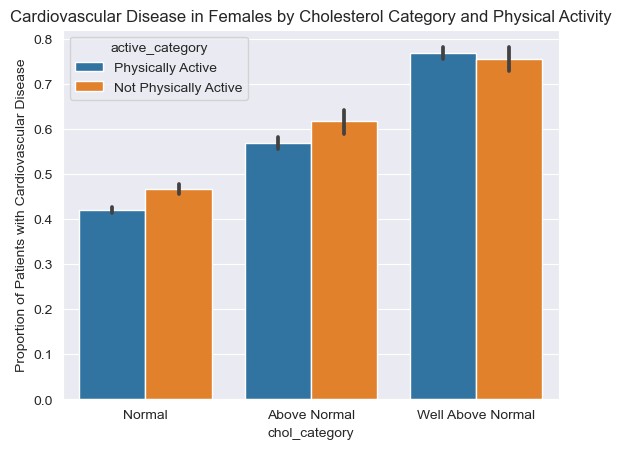

In [646]:
sns.barplot( x= 'chol_category', y= 'cardio', hue = 'active_category', order = hue_order, data = female_df)
plt.title("Cardiovascular Disease in Females by Cholesterol Category and Physical Activity")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

Looking at both BP Categories and Cholesterol Categories, we see that in the highest risk categories (Hypertension Stage 2 and Well Above Normal Cholesterol), physical activity difference doesn't affect much. However, looking at the other categories, not physically active females tend to have a slightly higher proportion of cardiovascular disease. 

**What does this mean?** \
If females fall into any of these "other" categories, considering a more active lifestyle might be good.

### <font color = "red">  Red Flag Order in Females </font> 
**First** Hypertension Stage 2 and/or Aged 50 or above\
**Second** For all other BP categories; Well Above Normal Cholesterol Levels\
**Third** For other cholesterol levels; Hypertension Stage 1\
**Fourth** For all other BP and cholesterol levels; consider greater physical activity

### Males: 

#### Combining BP Category and Cholesterol Level

In [605]:
male_df = cardio_health[cardio_health['gender']=="male"].copy()

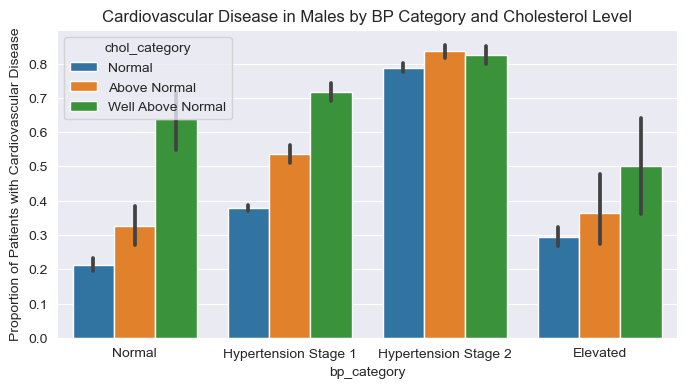

In [650]:
plt.figure(figsize=(8, 4))
sns.barplot( x= 'bp_category', y= 'cardio', hue = 'chol_category', hue_order = hue_order, order = bp_category_order, data = male_df)
plt.title("Cardiovascular Disease in Males by BP Category and Cholesterol Level")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

A similar observation is made for males as it was made for females above. Hypertension Stage 2, regardless of cholesterol level, poses a high risk, while the combination of "Well Above Normal" cholesterol particularly with Normal or Hypertension Stage 1 (and possible Elevated) BP pose high risks as well. We also see that the combination of "Above Normal" cholesterol and Hypertension Stage 1 post high risk too.

**What does this mean?** \
Assuming not being at Hypertension Stage 2, reaching "well above normal" cholesterol should be avoided, and an eye kept on not reaching Hypertension Stage 1 if at "above normal" cholesterol levels.

#### Combining BP Category and Physical Activity

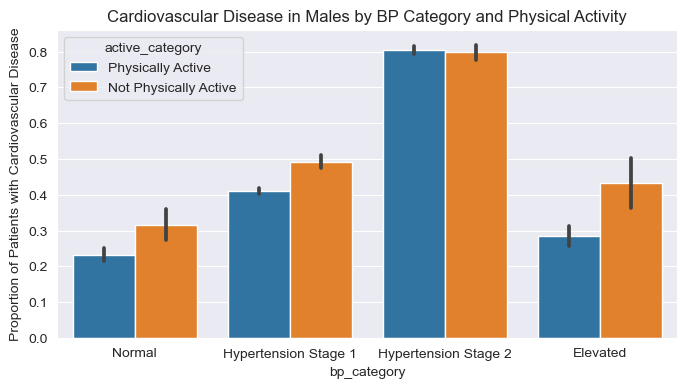

In [847]:
plt.figure(figsize=(8, 4))
sns.barplot( x= 'bp_category', y= 'cardio', hue = 'active_category', order = bp_category_order, data = male_df)
plt.title("Cardiovascular Disease in Males by BP Category and Physical Activity")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

Looking at this graph we can see that lack of physical activity results in higher prevalence of cardiovascular disease in the "Normal", "Hypertension Stage 1" and "Elevated" categories.

**What does this mean?** \
If a male does not fall under hypertension stage 2, engaging in physical activity is probably a significant lifestyle change that should be made in hopes of decreasing risk of cardiovascular disease

#### Combining Cholesterol Level and Physical Activity

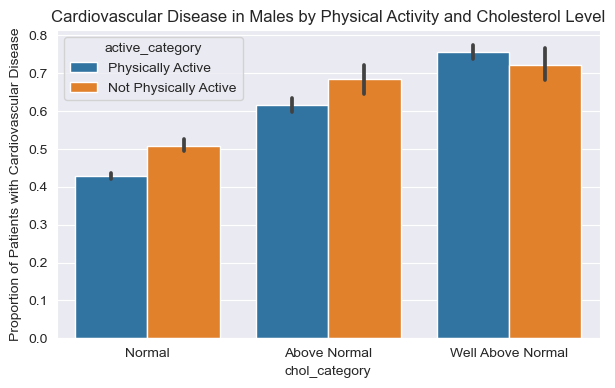

In [659]:
plt.figure(figsize=(7, 4))
sns.barplot( x= 'chol_category', y= 'cardio', hue = 'active_category', order = hue_order, data = male_df)
plt.title("Cardiovascular Disease in Males by Physical Activity and Cholesterol Level")
plt.ylabel("Proportion of Patients with Cardiovascular Disease")
plt.show()

For males, it seems that for "Normal" and "Above Normal" cholesterol categories, physical activity seeems to have a positive effect. However, once "Well Above Normal" is reached, proportions of cardiovascular disease are similar\
**What does this mean?** \
As long as "well above normal" cholesterol hasn't been reached, physical activity can play a significant role in protection from cardiovascular disease

### <font color = "red">  Red Flag Order in Males </font> 
**First** Hypertension Stage 2 and/or Aged 50 or above\
**Second** For all other BP categories,particularly Normal and Hypertension Stage 1; Well Above Normal Cholesterol Levels, \
**Third** For "Above Normal" Cholesterol; Hypertension Stage 1, then other BP categories\
**Fourth** For "normal" and "above normal" cholesterol levels, as well as Normal, Hypertension Stage 1, or Elevated BP; lack of physical activity

# <font color = "blue"> Conclusions </font> 
Based on gender disparities, we see some slight variation in approaches a healthcare provider could take in caregiving given the risk differences. However, it seems that overall the highest risks are high across the genders, and that only when it comes to lower risk levels do the variations come to light. 

# <font color = "blue"> Limitations </font> 
It's also important to note limitations in using this dataset. Several factors are binary or categorical, while in reality the measures could be very different (those at the bottom of the category might have different risk levels from those at the top).\
The main factor used to measure risk was proportion of patients with cardiovascular disease. Correlations were also used, however it is again important to notice the limitations of correlations given binary data. 

### <font color = "green"> Other Possible Approaches: </font> 
Other approaches could have been used to analyze, however when attempted didn't seem to serve the analysis much; they are highlighted below.
#### OLS Muti-variable regression

In [177]:
cardio_health.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category'],
      dtype='object')

In [179]:
import statsmodels.api as sm

In [185]:
iv_ols = pd.DataFrame(cardio_health[['ap_hi','ap_lo','age_years','cholesterol','weight','gluc']])
dv_ols = pd.DataFrame(cardio_health['cardio'])
iv_ols = sm.add_constant(iv_ols) 
regression_model_cardio = sm.OLS(dv_ols, iv_ols).fit()
regression_model_cardio.summary()
                    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cardio   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3392.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:32:07   Log-Likelihood:                -40592.
No. Observations:               68205   AIC:                         8.120e+04
Df Residuals:                   68198   BIC:                         8.126e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8243      0.019    -93.757      0.000      -1.862      -1.786
ap_hi           0.0105      0.000     66.377      0.000       0.010       0.011
ap_lo           0.0024      0.000      8.730      0.000       0.002       0.003
age_years       0.0104      0.000     40.628      0.000       0.010       0.011
cholesterol     0.0955      0.003     33.678      0.000       0.090       0.101
weight          0.0019      0.000     15.361      0.000       0.002       0.002
gluc           -0.0205      0.003     -6.202      0.000      -0.027      -0.014
==============================================================================
Omnibus:                    30471.391   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3559.527
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       1.888   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

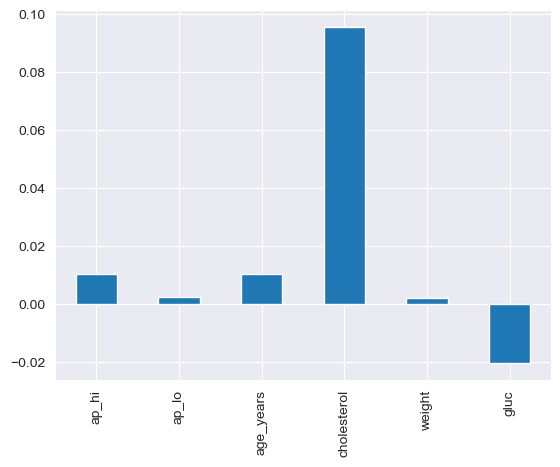

In [187]:
bar_plot_params = regression_model_cardio.params[['ap_hi','ap_lo','age_years','cholesterol','weight','gluc']]
bar_plot_params.plot(kind = 'bar')

**The low R-Squared makes it hard to rely on the regression model for analysis, and seems to highlight that the relationship between the values is probably not linear**